#### About SHAP

SHAP (Shapley Additive Explanations) value measures how much each feature in our model contributes, either positively (Good RiskPerformance) or negatively (Bad RiskPerformance) , to each prediction.
SHAP value can works on different kinds of machine learning models like linear regression, logistic regresstion, decision tree based, etc. 
There are some Explainers provide by Shap such as: TreeExplainer, LinearExplainer, KernelExplainer, DeepExplainer, etc

https://coderzcolumn.com/tutorials/machine-learning/shap-explain-machine-learning-model-predictions-using-game-theoretic-approach

Here, we demo ML models built by Decision Tree and Linear Regresion and  Random Forest algorithms and use SHAP values for explanation. 


In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import linear_model
import warnings
warnings.simplefilter(action ='ignore')

#### Dataset

In [306]:
df = pd.read_csv("heloc_dataset_v1.csv")
print(df.shape)
df.sample(5)

(10459, 24)


,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
8644,Bad,80,208,7,116,15,0,0,100,-7,...,27,1,1,1,38,34,3,3,0,86
2533,Good,78,167,0,66,33,0,0,100,-7,...,29,-7,0,0,0,76,2,4,0,43
1611,Bad,74,235,12,120,34,0,0,100,-7,...,32,0,0,0,52,58,13,3,4,74
9430,Bad,83,158,4,83,27,0,0,100,-7,...,71,0,1,1,1,66,2,3,1,63
3872,Good,85,148,4,58,42,0,0,100,-7,...,9,0,3,3,2,100,3,2,0,24


In [308]:
df.columns

Index(['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance'],
      dtype='object')

In [262]:
df= df.dropna()


In [263]:
#separate dependent  and independent variable
y = df.RiskPerformance
x = df.drop('RiskPerformance', axis = 1)

df['RiskPerformance'].replace ('Good',1, inplace=True)
df['RiskPerformance'].replace ('Bad',0, inplace=True)


In [264]:
# split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [265]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8367, 23)
(2092, 23)
(8367,)
(2092,)


### 1.  Decison Tree model

#### Model fitting

In [266]:
#set new_list2 to store rerults of selected features
new_list2 = []
# the loop
for k in range(10,23):
    
    #select classifier
    model = DecisionTreeClassifier(max_leaf_nodes = k, random_state=0, criterion='entropy')
    
    #fit the data
    fit=model.fit(x_train, y_train)
   
    #predict on test data
    predicted = model.predict(x_test)
    
    #try each feature and append results into new_list2
    new_list2.append(accuracy_score(y_test,predicted))


In [267]:
predicted

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [268]:
new_list2

[0.7084130019120459,
 0.7084130019120459,
 0.7117590822179732,
 0.7117590822179732,
 0.7117590822179732,
 0.7117590822179732,
 0.7122370936902486,
 0.7122370936902486,
 0.7122370936902486,
 0.7122370936902486,
 0.7122370936902486,
 0.7122370936902486,
 0.7122370936902486]

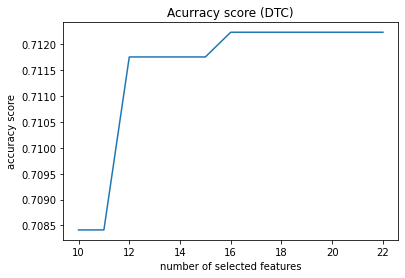

In [269]:
plt.plot(list(range(10,23)), new_list2)
plt.title("Acurracy score (DTC)")
plt.xlabel('number of selected features')
plt.ylabel('accuracy score')
plt.show()

Look like model reach highest accuracy when predicted on all 23 features.

#### Visualise Model Output

Confusion matrix, without normalization
[[845 250]
 [352 645]]
Normalized confusion matrix
[[0.7716895  0.2283105 ]
 [0.35305918 0.64694082]]


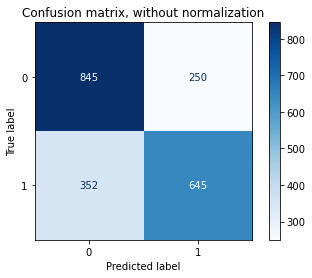

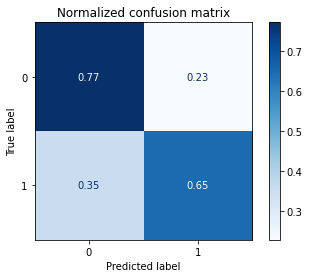

In [270]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [271]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1095
           1       0.72      0.65      0.68       997

    accuracy                           0.71      2092
   macro avg       0.71      0.71      0.71      2092
weighted avg       0.71      0.71      0.71      2092



The classification accuracy score is 71%, it's quite high but is it trustable???

In [272]:
# importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

### Model explaination by SHAP Tree Explainer
Here we use the decision tree based model so we will use Shap Tree Explainer to obtain Shapley values 

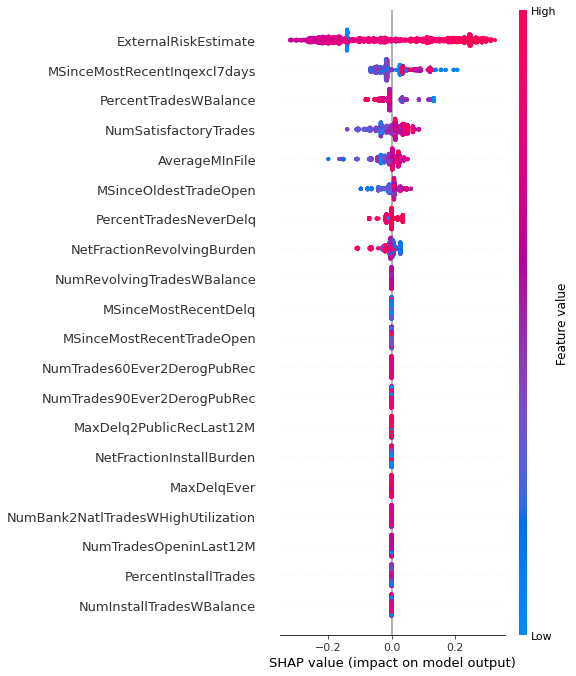

In [273]:
# compute shap values
explainer = shap.TreeExplainer(model, x_test)
shap_values = explainer.shap_values(x_test)

# visualise shap values for class 1
shap.summary_plot(shap_values[1], x_test)

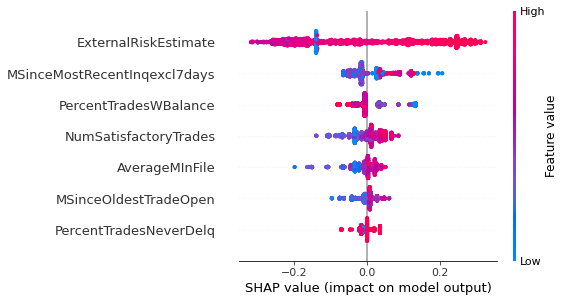

In [274]:
# visulise top 7 features impact the model’s output
shap.summary_plot(shap_values[1], x_test, max_display=7)

- The side colors bar from high to low indicate the value of the feature. Gradient color indicates the original value for the variables. In booleans, it will take two colors, but in number it can contain the whole spectrum.
- The x-axis tells risk: positive side tells that there is a risk and negative side tells that there is no risk. 
- The y-axis is in order of importance from top to bottom.
- Each point represents a row from the original dataset.

Here, the negative side is 0 (Good RiskPerformance) ,  the positive side is 1 (Bad RiskPerformance)

These rerults show the relative importance of the features in the model overall. 
The high posive `ExternalRiskEstimate` determines there is a risk, and lower value determines there is no risk.
But see that the `MSinceMostRecentInqexcl7days` lower value determines there is no risk, and the higher value determines there is a risk. 

The features are sorted by their significance in the data. We can see that `ExternalRiskEstimate` is the most important feature. And the graph also shows the top 7 important features. 

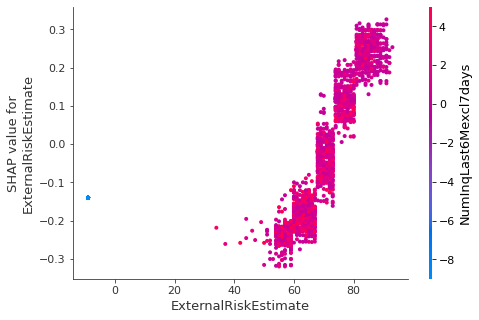

In [275]:
shap.dependence_plot('ExternalRiskEstimate',shap_values[1], x_test,
                     interaction_index="NumInqLast6Mexcl7days")

Look at an interpretation chart for a `RiskPerformance` that was classified as Good:

In [276]:
shap.force_plot(explainer.expected_value, shap_values[1, :], x_test.iloc[1], matplotlib=True)

TypeError: list indices must be integers or slices, not tuple

Look at an interpretation chart for a `RiskPerformance` that was classified as Bad: 

In [277]:
shap.force_plot(explainer.expected_value, shap_values[1, :], x_test.iloc[0], matplotlib=True)

TypeError: list indices must be integers or slices, not tuple

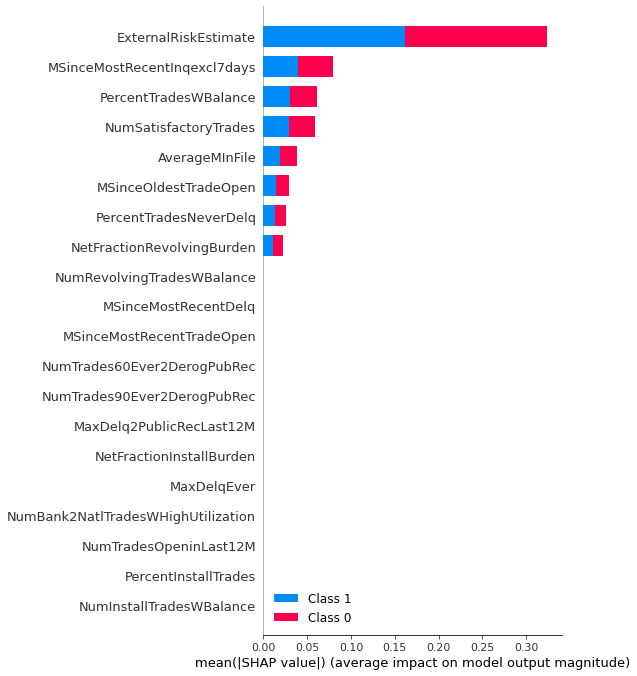

In [278]:
# visualise shap values
shap.summary_plot(shap_values, x_test)

- The length of the bar tells us how much influence the feature has on the prediction.
- The graph shows the features in descending order of importance, according to the mean SHAP value.
- What is mean shape value?  SHAP first computes scores per observation, but to get contributions of each feature overall, it averages the values across observations.
- class 0: Bad RiskPerformance , class 1: Good RiskPerformance


In [279]:
shap.force_plot(explainer.expected_value, shap_values[1, :],
                x_test.iloc[1], matplotlib=True)

TypeError: list indices must be integers or slices, not tuple

### 2. Linear regression model 

#### Model fitting

In [280]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr_model = lr.fit(x_train,y_train)

In [281]:
lr_model.predict(x_train)

array([0.28061798, 0.28707246, 0.26353972, ..., 0.42530193, 0.1527129 ,
       0.6346181 ])

In [282]:
print("Test R^2 Score  : ", lr.score(x_test, y_test))
print("Train R^2 Score : ", lr.score(x_train, y_train))

Test R^2 Score  :  0.22886387416707865
Train R^2 Score :  0.22888329422414733


### Model explaination by Shap Linear Explainer
Here the model is linear based so we use LinearShap to obtain Shapley values

In [283]:
explainer = shap.LinearExplainer(lr_model, x_test)  # if use decision tree based model, use TreeExpl instead
shap_values = explainer.shap_values(x_test)

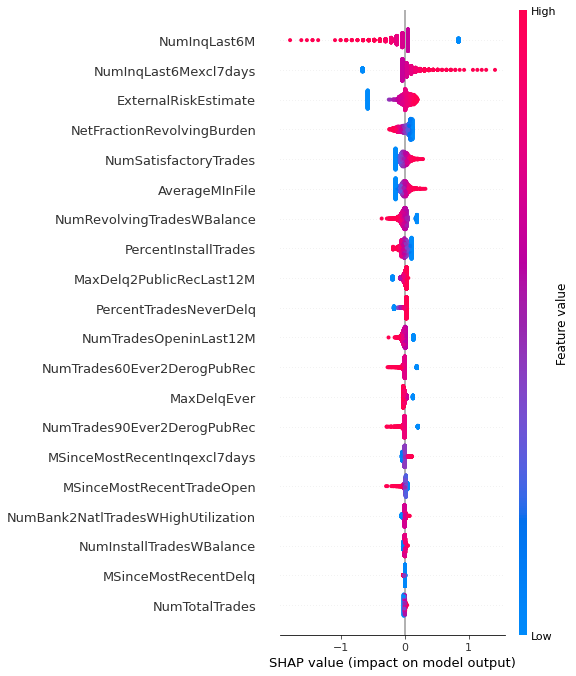

In [284]:
shap.summary_plot(shap_values, x_test)

This result shows the relative importance of the features in the model overall. Look closer below:

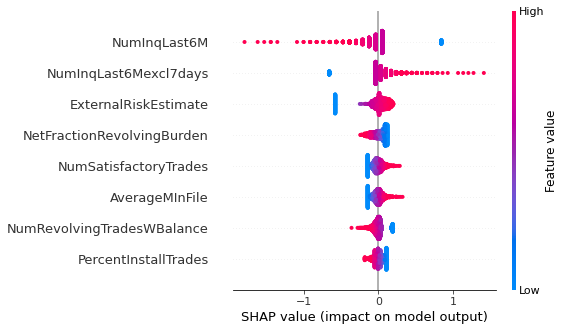

In [285]:
# visualise top 7 features impact the model’s output
shap.summary_plot(shap_values, x_test, max_display=8)

In this result, the high negative `NumInqLast6M` determines there is no risk, and lower value determines there is a risk.
But see that the `NumInqLast6Mexcl7days` higher positive value determines there is a risk, and the low value determines there is no risk. 


In [103]:
df.columns

Index(['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance'],
      dtype='object')

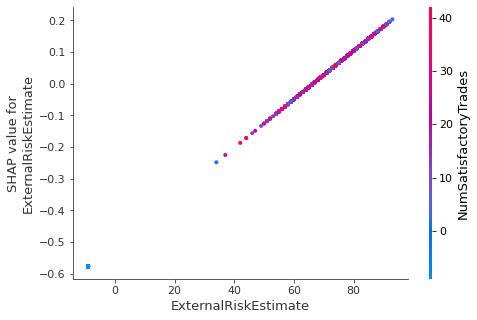

In [286]:
shap.dependence_plot('ExternalRiskEstimate', shap_values, x_test)

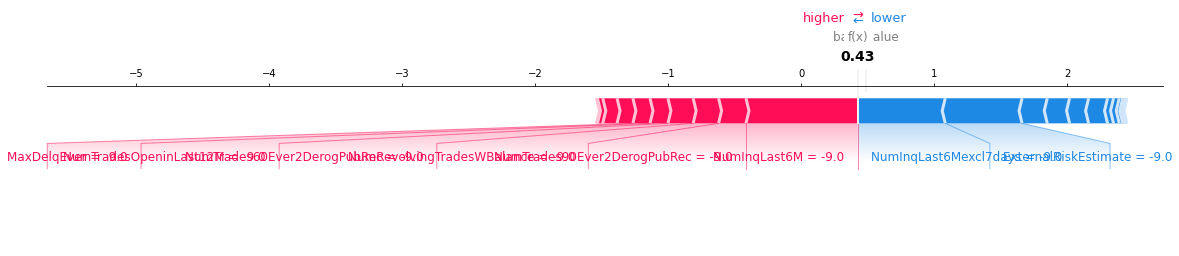

In [287]:
# Look at an interpretation chart for a `RiskPerformance` that was classified as Bad: 

shap.force_plot(explainer.expected_value, shap_values[1, :], x_test.iloc[1], matplotlib=True)
                                                                        

- Red color indicates features that are pushing the prediction higher, and blue color indicates just the opposite.
- Features on red pushed RiskPerformance towards a low risk (good RiskPerformance) while features on blue pushed RiskPerformance towards a high risk (bad RiskPerformance).


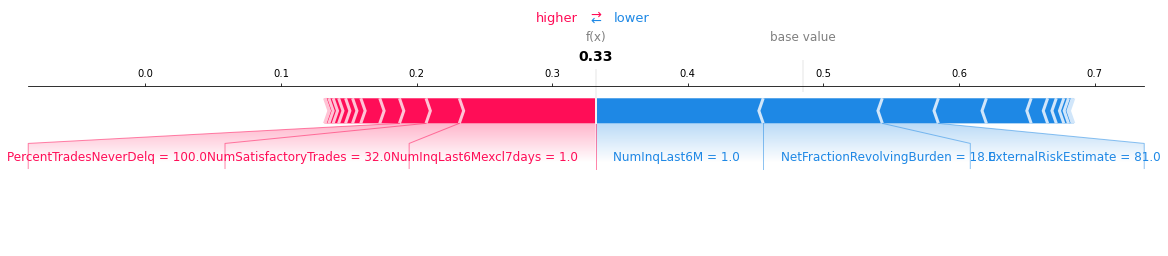

In [288]:
# Look at an interpretation chart for a RiskPerformance that was classified as Good: 

shap.force_plot(explainer.expected_value, shap_values[2, :], x_test.iloc[0], matplotlib=True)

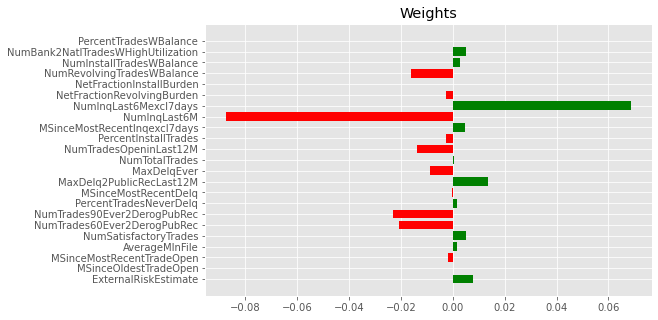

In [289]:
## LIME 

# Below we have printed actual global weights we got from the linear regression model as a matplotlib bar chart. 
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(8,5))
    plt.barh(range(len(lr.coef_)), lr.coef_, color=["red" if coef<0 else "green" for coef in lr.coef_])
    plt.yticks(range(len(lr.coef_)), x_train.columns);
    plt.title("Weights")

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, 
                                                   feature_names=predictor.columns, 
                                                   verbose=True, 
                                                   class_names=['Approve', 'Deny'],
                                                   mode='regression')
idx = random.randint(1, len(X_test))
print("Prediction : ", lr.predict(X_test[idx].reshape(1,-1)))
print("Actual :     ", y_test[idx])

explanation = explainer.explain_instance(X_test[idx], lr.predict, num_features=len(predictor.columns))
explanation

explanation.show_in_notebook()

## Random Forest Regression Model explaination by LIME

In [294]:
# import Explainer function from lime_tabular module of lime library
from lime.lime_tabular import LimeTabularExplainer

# training the random forest model
rf_model = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=-1, random_state=10)
rf_model.fit(x_train, y_train)

# creating the explainer function
explainer = LimeTabularExplainer(x_train.values, mode="regression", feature_names=x_train.columns)

# storing a new observation
i = 6
x_observation = x_test.iloc[[i], :]


In [295]:
RF_prediction =rf_model.predict(x_observation)[0]
RF_prediction

0.8198157654574616

In [296]:
# explanation using the random forest model
explanation = explainer.explain_instance(x_observation.values[0], rf_model.predict)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.6002620257096236


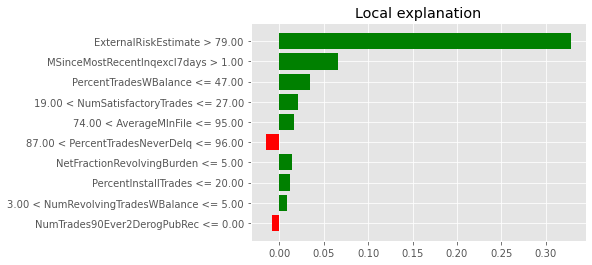

In [293]:
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()

### 3. Random Forest model - Using existing model

For this part, we use an existing model build by Random Forest algorithm from scikit-learn and used the SHAP Tree Explainer for explanation.

#### Model fitting

### Visualise model output

### Model explaination by SHAP TreeExplainer